# Configuração do ambiente

In [13]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans
import config
import util_designite

# Files and Commits

### Dado o conjunto de commits abaixo e seus respectivos arquivos: 

C1 -> [F1, F2]

C2 -> [**F2, F3**]

C3 -> [**F2, F3, F4**]

C4 -> [**F2, F3**, F5]

C5 -> [F6, F7, F8, F9]

C6 -> [**F2, F3, F4**, F10]

Os seguintes conjuntos se repetem em mais de um commit: (F2, F3) e (F2, F3, F4)

In [2]:
# Lista de arquivos analisados
files = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']

# Lista de arquivos que aparecem em cada commit
c1 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
c2 = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
c3 = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
c4 = [0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
c5 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
c6 = [0, 1, 1, 1, 0, 0, 0, 0, 0, 1]

### Daframe que representa a relação entre arquivos e commits

In [3]:
df_files_commits = pd.DataFrame.from_dict({'file': files, 'c1':c1, 'c2':c2, 'c3':c3, 'c4':c4, 'c5':c5, 'c6':c6})
df_files_commits

,file,c1,c2,c3,c4,c5,c6
0,f1,1,0,0,0,0,0
1,f2,1,1,1,1,0,1
2,f3,0,1,1,1,0,1
3,f4,0,0,1,0,0,1
4,f5,0,0,0,1,0,0
5,f6,0,0,0,0,1,0
6,f7,0,0,0,0,1,0
7,f8,0,0,0,0,1,0
8,f9,0,0,0,0,1,0
9,f10,0,0,0,0,0,1


### Dados dos commits que serão analisados

In [4]:
X = df_files_commits[['c1', 'c2', 'c3', 'c4', 'c5', 'c6']]
X

,c1,c2,c3,c4,c5,c6
0,1,0,0,0,0,0
1,1,1,1,1,0,1
2,0,1,1,1,0,1
3,0,0,1,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,0,1


### Elbow Method
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾

In [5]:
def elbow_method(X, range_from, range_to):
  # calculate distortion for a range of number of cluster
  distortions = []
  for i in range(range_from, range_to):
    km = KMeans(i)
    km.fit(X)
    distortions.append(km.inertia_)
  # plot
  plt.plot(range(range_from, range_to), distortions, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.show()

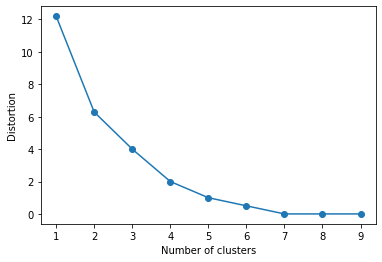

In [6]:
elbow_method(X, 1, 10)

## Para k=5

In [7]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Identificação dos clusters

In [8]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([4, 1, 1, 2, 3, 0, 0, 0, 0, 2], dtype=int32)

In [9]:
data_with_clusters = df_files_commits.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters.sort_values(['cluster'])

,file,c1,c2,c3,c4,c5,c6,cluster
5,f6,0,0,0,0,1,0,0
6,f7,0,0,0,0,1,0,0
7,f8,0,0,0,0,1,0,0
8,f9,0,0,0,0,1,0,0
1,f2,1,1,1,1,0,1,1
2,f3,0,1,1,1,0,1,1
3,f4,0,0,1,0,0,1,2
9,f10,0,0,0,0,0,1,2
4,f5,0,0,0,1,0,0,3
0,f1,1,0,0,0,0,0,4


### Mostra os grupos encontrados

In [10]:
def mostra_grupos(list_of_clusters, data_with_clusters):
  dictionary_of_clusters = {}
  list_of_groups = []
  for cluster in list_of_clusters:
    for index, row in data_with_clusters.iterrows():
      if cluster == row['cluster']:
        list_of_groups.append(row['file'])
    dictionary_of_clusters[cluster] = list_of_groups
    list_of_groups = []
    
  for k, v in dictionary_of_clusters.items():
    print(f'grupo {k} : {v}')
    
  return dictionary_of_clusters

In [11]:
list_of_clusters = list(data_with_clusters['cluster'])
list_of_clusters = list(set(list_of_clusters))
print(list_of_clusters)
dictionary_of_clusters = mostra_grupos(list_of_clusters, data_with_clusters)

[0, 1, 2, 3, 4]
grupo 0 : ['f6', 'f7', 'f8', 'f9']
grupo 1 : ['f2', 'f3']
grupo 2 : ['f4', 'f10']
grupo 3 : ['f5']
grupo 4 : ['f1']


# Teste com dados reais

## Dataframe com os commits e arquivos modificados na versão 3.1 do Cassandra

In [14]:
df_files_commits_real = pd.read_csv('df_files_commits.csv', sep=',')
df_files_commits_real.head(12)

,file,5cafe8606fa1f28b535c69c57f78593c4e6ea85a,882adf0ae638c69928e14ed7e34de7364ed65ba1,2af4fba7e586b17f9e7bc54b761ef2909d690b12,99617a529378f00cb86ab733959c7be9966860c9,d867ac1f41c59b31f8fb4f54a06c0118018cfc81,fb463c79e0cb63114a2f220182e7c7ed3e0f4205,3674ad9dab8f29173d7d4ee82488a8e9ea586240,a320737b18c19e3ec59035e5e487f2af1dcd0172,852a8babd4bafe26de91049cec37ffe6fb33cacb,...,1a00f001fad5636b846062b340237c1a331d77ac,879c49bb7d28946187a04e5cd76236d652825579,8fd810c94575e0e0d16696e7c1027c86f7ddf1f1,d1a596a4ad6717f03917877fc50714bafa55de97,a4da379bb042fcf171a560af5edd9e785d6f8e4e,2b8cdc2343a2169f764511a54f32e0cd41078f40,ee46dfbf934fc91d8d4865bef174b68174790edd,cf567703db2cc6859731405322f19f55345b5c57,5b9f8eb3980f8614bc897a14c11ed9cc9c6747b7,e092873728dc88aebc6ee10153b9bd3cd90cd858
0,StorageService.java,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ColumnFamilyStore.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gossiper.java,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RowCacheTest.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,StorageProxy.java,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CompactionManager.java,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SSTableRewriter.java,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,StreamReader.java,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NodeProbe.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,SecondaryIndexManager.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_files_commits_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Columns: 321 entries, file to e092873728dc88aebc6ee10153b9bd3cd90cd858
dtypes: int64(320), object(1)
memory usage: 30.2+ KB


## Commits analisados

In [16]:
X_commits = df_files_commits_real.iloc[:, 1:321]
X_commits

,5cafe8606fa1f28b535c69c57f78593c4e6ea85a,882adf0ae638c69928e14ed7e34de7364ed65ba1,2af4fba7e586b17f9e7bc54b761ef2909d690b12,99617a529378f00cb86ab733959c7be9966860c9,d867ac1f41c59b31f8fb4f54a06c0118018cfc81,fb463c79e0cb63114a2f220182e7c7ed3e0f4205,3674ad9dab8f29173d7d4ee82488a8e9ea586240,a320737b18c19e3ec59035e5e487f2af1dcd0172,852a8babd4bafe26de91049cec37ffe6fb33cacb,a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7,...,1a00f001fad5636b846062b340237c1a331d77ac,879c49bb7d28946187a04e5cd76236d652825579,8fd810c94575e0e0d16696e7c1027c86f7ddf1f1,d1a596a4ad6717f03917877fc50714bafa55de97,a4da379bb042fcf171a560af5edd9e785d6f8e4e,2b8cdc2343a2169f764511a54f32e0cd41078f40,ee46dfbf934fc91d8d4865bef174b68174790edd,cf567703db2cc6859731405322f19f55345b5c57,5b9f8eb3980f8614bc897a14c11ed9cc9c6747b7,e092873728dc88aebc6ee10153b9bd3cd90cd858
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


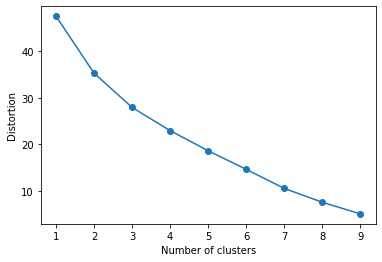

In [17]:
elbow_method(X_commits, 1,10)

## para K=10

In [21]:
kmeans_dados_reais = KMeans(10)
kmeans_dados_reais.fit(X_commits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
identified_clusters_dados_reais = kmeans.fit_predict(X_commits)
identified_clusters_dados_reais

array([0, 1, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3], dtype=int32)

In [23]:
data_with_clusters_dados_reais = df_files_commits_real.copy()
data_with_clusters_dados_reais['cluster'] = identified_clusters_dados_reais
data_with_clusters_dados_reais[['file', 'cluster']].sort_values(['cluster'])

,file,cluster
0,StorageService.java,0
2,Gossiper.java,0
4,StorageProxy.java,0
5,CompactionManager.java,0
6,SSTableRewriter.java,0
1,ColumnFamilyStore.java,1
7,StreamReader.java,2
8,NodeProbe.java,2
9,SecondaryIndexManager.java,2
11,MigrationManager.java,3


## Mostra os grupos encontrados

In [24]:
list_of_clusters_dados_reais = list(data_with_clusters_dados_reais['cluster'])
list_of_clusters_dados_reais = list(set(list_of_clusters_dados_reais))
print(f'Grupos: {list_of_clusters_dados_reais}')

dictionary_of_clusters_dados_reais = mostra_grupos(list_of_clusters_dados_reais, data_with_clusters_dados_reais)

Grupos: [0, 1, 2, 3, 4]
grupo 0 : ['StorageService.java', 'Gossiper.java', 'StorageProxy.java', 'CompactionManager.java', 'SSTableRewriter.java']
grupo 1 : ['ColumnFamilyStore.java']
grupo 2 : ['StreamReader.java', 'NodeProbe.java', 'SecondaryIndexManager.java']
grupo 3 : ['MigrationManager.java']
grupo 4 : ['RowCacheTest.java', 'SecondaryIndexTest.java']


## Dataframe com os 100 arquivos mais modificados na versão 3.1 do Cassandra

In [25]:
filepath = util_designite.PATH_ARQUIVOS_MODIFICADOS_V_3_1_0 + '/' + 'df_100_arquivos_mais_modificados.csv'
df_100_arquivos_mais_modificados = pd.read_csv(filepath, sep=',')
colunas = ['name', 'hash', 'date', 'modifications', 'nloc', 'complexity']
df_100_arquivos_mais_modificados[colunas].head(10)

,name,hash,date,modifications,nloc,complexity
0,StorageService.java,6bad57fc3cf967838a220d8402db37ed9a5b3b4e,2015-11-11 15:02:26,65,3306,717
1,StorageService.java,6bb6bb005197c33fa94026d472ff78d4f36613cc,2015-11-11 15:04:25,65,3302,703
2,StorageService.java,9a90e9894e9e079058876cf2b16a47d29ba0a32a,2015-11-11 15:05:35,61,3344,718
3,StorageService.java,ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb,2015-11-10 17:22:11,6,3311,718
4,StorageService.java,a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7,2015-10-29 12:36:32,3,3314,719
5,StorageService.java,99b82dbb43277035562e7b82bb9bdebd84510e96,2015-11-10 13:08:05,9,3311,705
6,StorageService.java,ae315b5ec944571342146867c51b2ceb50f3845e,2015-11-16 15:48:33,9,3351,720
7,StorageService.java,7650fc196341bd673626054593f2ce6e895d7783,2015-11-27 13:49:15,32,3333,726
8,StorageService.java,51753263a4c4d50c5bbe7bb80636cca5b6458ecf,2015-12-01 10:41:05,14,3333,726
9,StorageService.java,15f03ab446854cf4d2999c3785d145c89bc3a3e4,2015-11-25 16:45:02,19,3319,710


## Mostra as alterações de 'StorageService.java', 'Gossiper.java', 'StorageProxy.java', 'CompactionManager.java', 'SSTableRewriter.java'

In [26]:
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'StorageService.java' or row['name'] == 'Gossiper.java' or row['name'] == 'StorageProxy.java' or row['name'] == 'CompactionManager.java' or row['name'] =='SSTableRewriter.java':
    print(row['name'], row['hash'])

StorageService.java 6bad57fc3cf967838a220d8402db37ed9a5b3b4e
StorageService.java 6bb6bb005197c33fa94026d472ff78d4f36613cc
StorageService.java 9a90e9894e9e079058876cf2b16a47d29ba0a32a
StorageService.java ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb
StorageService.java a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7
StorageService.java 99b82dbb43277035562e7b82bb9bdebd84510e96
StorageService.java ae315b5ec944571342146867c51b2ceb50f3845e
StorageService.java 7650fc196341bd673626054593f2ce6e895d7783
StorageService.java 51753263a4c4d50c5bbe7bb80636cca5b6458ecf
StorageService.java 15f03ab446854cf4d2999c3785d145c89bc3a3e4
Gossiper.java 6bad57fc3cf967838a220d8402db37ed9a5b3b4e
Gossiper.java 6bb6bb005197c33fa94026d472ff78d4f36613cc
Gossiper.java 9a90e9894e9e079058876cf2b16a47d29ba0a32a
Gossiper.java 582b66fbdfbedd8eb14b16c9f6522067ea921a13
Gossiper.java 7650fc196341bd673626054593f2ce6e895d7783
Gossiper.java 51753263a4c4d50c5bbe7bb80636cca5b6458ecf
Gossiper.java b89037fe400b2b5097961c8276fa5c157b6cd49c
Stora

## Mostra os commits em comum de 'StorageService.java', 'Gossiper.java', 'StorageProxy.java', 'CompactionManager.java', 'SSTableRewriter.java'

In [27]:
dictionary_commist_em_comum = {}
lista_auxiliar = []

for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'StorageService.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['StorageService.java'] = lista_auxiliar

lista_auxiliar = []
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'Gossiper.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['Gossiper.java'] = lista_auxiliar

lista_commits_em_comum = []

for item1 in dictionary_commist_em_comum['StorageService.java']:
  for item2 in dictionary_commist_em_comum['Gossiper.java']:
    if item1 == item2:
      lista_commits_em_comum.append(item1)
  
print("Os arquivos 'StorageService.java', 'Gossiper.java'aparecem juntos nos seguintes commits:")
print(lista_commits_em_comum)

Os arquivos 'StorageService.java', 'Gossiper.java'aparecem juntos nos seguintes commits:
['6bad57fc3cf967838a220d8402db37ed9a5b3b4e', '6bb6bb005197c33fa94026d472ff78d4f36613cc', '9a90e9894e9e079058876cf2b16a47d29ba0a32a', '7650fc196341bd673626054593f2ce6e895d7783', '51753263a4c4d50c5bbe7bb80636cca5b6458ecf']
